# Photosynthesis
***
$$C0_2 + 2 H_20 + photons \rightarrow CH_2O + 0_2 + H_20$$

https://en.wikipedia.org/wiki/Photosynthesis

cite: Whitmarsh J, Govindjee (1999). "Chapter 2: The Basic Photosynthetic Process". In Singhal GS, Renger G, Sopory SK, Irrgang KD, Govindjee (eds.). Concepts in Photobiology: Photosynthesis and Photomorphogenesis. Boston: Kluwer Academic Publishers. p. 13. ISBN 978-0-7923-5519-9.
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../..')))

MatPlotLib is used for creating custom visualizations

In [2]:
import matplotlib.pyplot as plt

In [3]:
import gillespy2

***
## Create the Model
***

In [4]:
def create_photosynthesis(parameter_values=None):
    # Initialize Model
    model = gillespy2.Model(name="Photosynthesis")
    
    # Set System Volume
    model.volume = 1

    # Define Variables (GillesPy2.Species)
    co2 = gillespy2.Species(name="CarbonDioxide", initial_value=80, mode="continuous")
    h2o = gillespy2.Species(name="Water", initial_value=100, mode="continuous")
    light = gillespy2.Species(name="Photons", initial_value=0, mode="continuous")
    carb = gillespy2.Species(name="Carbohydrate", initial_value=0, mode="dynamic", switch_min=50)
    o = gillespy2.Species(name="Oxygen", initial_value=100, mode="continuous")
    
    # Add Variables to Model
    model.add_species([co2, h2o, light, carb, o])

    # Define Parameters
    k1 = gillespy2.Parameter(name="k1", expression="0.00001")
    D = gillespy2.Parameter(name="D", expression="0.25")
    ka = gillespy2.Parameter(name="ka", expression="100")
    ka2 = gillespy2.Parameter(name="ka2", expression="80")
    kd = gillespy2.Parameter(name="kd", expression="1")
    
    # Add Parameters to Model
    model.add_parameter([k1, D, ka, ka2, kd])

    # Define Reactions
    r1 = gillespy2.Reaction(
        name="Photosynthesis", propensity_function="CarbonDioxide*2*Water*Photons*k1",
        reactants={'CarbonDioxide': 1, 'Water': 2},
        products={'Carbohydrate': 1, 'Oxygen': 1, 'Water': 1}
    )
    r2 = gillespy2.Reaction(
        name="WaterDiffusionIn", propensity_function="D*ka",
        reactants={}, products={'Water': 1},
    )
    r3 = gillespy2.Reaction(
        name="WaterDiffusionOut", propensity_function="D*kd*Water",
        reactants={'Water': 1}, products={}
    )
    r4 = gillespy2.Reaction(
        name="CarbonDioxideDiffusionIn", propensity_function="D*ka2",
        reactants={}, products={'CarbonDioxide': 1}
    )
    r5 = gillespy2.Reaction(
        name="CarbonDioxideDiffusionOut", propensity_function="D*kd*CarbonDioxide", 
        reactants={'CarbonDioxide': 1}, products={}
    )
    r6 = gillespy2.Reaction(
        name="oxygenDiffusionIn", propensity_function="D*ka", 
        reactants={}, products={'Oxygen': 1}
    )
    r7 = gillespy2.Reaction(
        name="oxygenDiffusionOut", propensity_function="D*kd*Oxygen", 
        reactants={'Oxygen': 1}, products={}
    )
    
    # Add Reactions to Model
    model.add_reaction([r1, r2, r3, r4, r5, r6, r7])
    
    # Define Rate Rules
    sunlight = gillespy2.RateRule(name="sunlight", formula="5*sin(t/3.14159)", variable="Photons")
    
    # Add Rate Rules to Model
    model.add_rate_rule(sunlight)


    # Define Timespan
    tspan = gillespy2.TimeSpan.arange(t=40, increment=0.05)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [5]:
model = create_photosynthesis()

***
# Run the Simulations
***

In [6]:
%time results = model.run(algorithm="Tau-Hybrid")

CPU times: user 18.6 ms, sys: 14.3 ms, total: 32.9 ms
Wall time: 5.98 s


***
# Visualizations
***

In [7]:
results.plotplotly()

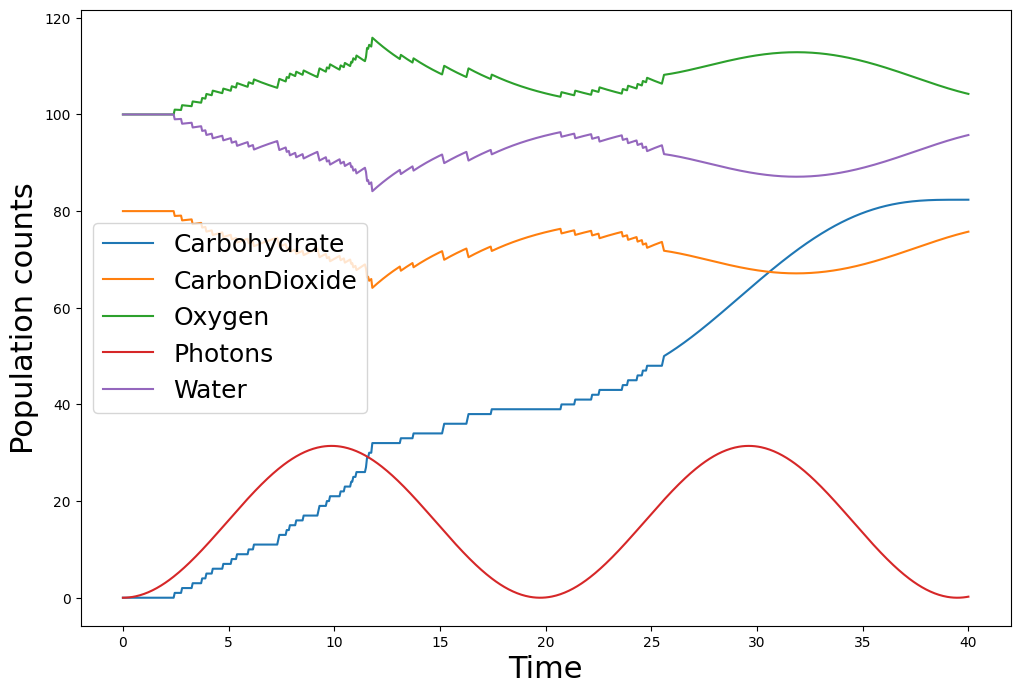

In [8]:
results.plot(figsize=(12,8))
plt.legend(fontsize=18)
plt.ylabel('Population counts', fontsize=22)
plt.xlabel('Time', fontsize=22)
plt.savefig('GillesPy2_photosynthesis_ex.pdf')